In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [2]:
nami_extent = {
    "xmin" : 90,
    "xmax" : 325.83,
    "ymin" : -60,
    "ymax" : 70,
}

In [3]:
nami = pd.read_json(f"./pois")

Check that the pixels make sense

In [4]:
nami

,21401,21413,21414,21418,21419,32401,32411,32412,32413,43412,43413,46404,46407,46411,46412,51407,51425,52403,52406,55012
location,"[152.583, 42.617]","[152.132, 30.533]","[178.219, 48.968]","[148.645, 38.727]","[155.717, 44.435]","[286.579, -20.474]","[269.12, 4.953]","[273.626, -17.984]","[266.483, -7.406]","[253.03300000000002, 16.045]","[259.91700000000003, 11.012]","[231.267, 45.853]","[231.168, 42.682]","[232.933, 39.333]","[239.437, 32.492]","[203.455, 19.57]","[183.68, -9.517]","[145.52, 4.02]","[164.977, -5.307]","[158.453, -15.664]"
pixel,"[1251, 2052]","[1242, 1810]","[1764, 2179]","[1173, 1974]","[1314, 2088]","[3930, 790]","[3581, 1299]","[3671, 840]","[3528, 1051]","[3260, 1520]","[3397, 1420]","[2824, 2116]","[2822, 2053]","[2858, 1986]","[2988, 1849]","[2268, 1591]","[1873, 1009]","[1110, 1280]","[1499, 1093]","[1369, 886]"
surface,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
time,"[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989...","[2.936631988622083, 5.873263977244166, 8.80989..."
shallowCorrectionFactor,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
ds = 3

In [6]:
skip = 1 

(152.583, 152.55), (42.617, 42.599999999999994)
(152.132, 152.1), (30.533, 30.5)
(178.219, 178.2), (48.968, 48.95)
(148.645, 148.65), (38.727, 38.7)
(155.717, 155.7), (44.435, 44.400000000000006)
(286.579, 286.5), (-20.474, -20.5)
(269.12, 269.05), (4.953, 4.950000000000003)
(273.626, 273.55), (-17.984, -18.0)
(266.483, 266.4), (-7.406, -7.450000000000003)
(253.03300000000002, 253.0), (16.045, 16.0)
(259.91700000000003, 259.85), (11.012, 11.0)
(231.267, 231.2), (45.853, 45.8)
(231.168, 231.1), (42.682, 42.650000000000006)
(232.933, 232.9), (39.333, 39.3)
(239.437, 239.4), (32.492, 32.45)
(203.455, 203.4), (19.57, 19.549999999999997)
(183.68, 183.65), (-9.517, -9.549999999999997)
(145.52, 145.5), (4.02, 4.0)
(164.977, 164.95), (-5.307, -5.350000000000001)
(158.453, 158.45), (-15.664, -15.700000000000003)


Text(0.5, 1.0, 'pixel vs real')

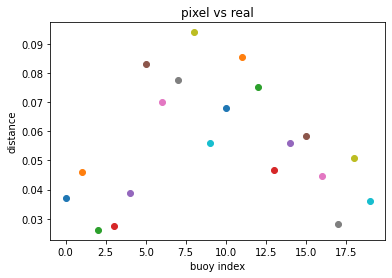

In [7]:
for i, buoy in enumerate(nami.keys()):
    buoy_lon, buoy_lat = nami[buoy]["location"]
    buoy_lon_pixel, buoy_lat_pixel = nami[buoy]["pixel"]
    lon_pixel = buoy_lon_pixel * ds*skip/60 + nami_extent["xmin"]
    lat_pixel = buoy_lat_pixel * ds*skip/60 + nami_extent["ymin"]  
    p0 = np.array([buoy_lon, buoy_lat])
    p1 = np.array([lon_pixel, lat_pixel])
    distance = np.linalg.norm(p0-p1, 2)
    plt.scatter([i], [distance])

    print(f"{buoy_lon, lon_pixel}, {buoy_lat, lat_pixel}")
plt.xlabel("buoy index")
plt.ylabel("distance")
plt.title("pixel vs real")
